In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rcParams,font_manager,colors,patches
import pandas as pd
import scipy.stats as sts
from collections.abc import Iterable

In [38]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [39]:
direc = 'C:/Users/svo/Google Drive/Bas Games/Analysis/'
fig_direc = 'C:/Users/svo/Google Drive/Bas Games/Figures/'

In [80]:
model_moves = np.loadtxt(direc + 'Model prediction/prediction_hvh.txt',dtype=int)
move_stats_hvh = np.loadtxt(direc + 'Move statistics/move_stats_hvh.txt',dtype=int)
num_pieces_hvh = move_stats_hvh[:,3]
human_move = move_stats_hvh[:,4]
player = move_stats_hvh[:,0]
#model_accuracy = np.mean(model_moves==human_move[:,None],axis=1)
model_accuracy = np.argmax(np.apply_along_axis(lambda arr: np.bincount(arr,minlength=36),1,model_moves),axis=1)==human_move

In [81]:
def parse_binstring(x):
    return np.array(list("{0:036b}".format(x))).astype(bool)

data_hvh = pd.read_csv(direc + 'data_hvh.txt',delim_whitespace=True,
                       names=['bp','wp','color','response','rt','subject','group'])
black_pieces = np.vstack(data_hvh['bp'].map(parse_binstring).values)
white_pieces = np.vstack(data_hvh['wp'].map(parse_binstring).values)
actual_moves = np.vstack(data_hvh['response'].map(parse_binstring).values)
occupied_squares = black_pieces + white_pieces

def report_stats(m,baseline):
    if isinstance(baseline, Iterable):
        print(np.mean(m),np.std(m)/np.sqrt(len(m)),sts.ttest_rel(m,baseline))
    else:
        print(np.mean(m),np.std(m)/np.sqrt(len(m)),sts.ttest_1samp(m,baseline))


In [84]:
def show_model_example(i):    
    fig,ax=plt.subplots(figsize=(6,4))
    ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5,color='black')
    ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5,color='black')
    cm = colors.LinearSegmentedColormap.from_list('gray_red_map', [colors.to_rgb('darkgray'), 
                                                                colors.to_rgb('red')], N=100)    
    for k in range(36):
        if(black_pieces[i][k]):
            circ = patches.Circle((k%9,k//9),0.33,color="black",fill=True)
            circ = ax.add_patch(circ)
        if(white_pieces[i][k]):
            circ = patches.Circle((k%9,k//9),0.33,color="white",fill=True)
            circ = ax.add_patch(circ)
        if(actual_moves[i][k]):
            circ = patches.Circle((k%9,k//9),0.33,fill=False,linewidth=4,
                                  color=("black" if np.sum(occupied_squares[i])%2==0 else "white"))
            circ = ax.add_patch(circ)
    plt.imshow(np.reshape(np.bincount(model_moves[i],minlength=36),[4,9])/100, 
               cmap=cm,interpolation='nearest',origin='lower',vmin=0,vmax=0.5)
    ax.axis('off')
    fig.tight_layout()
    fig.savefig(fig_direc + 'figure_2a.pdf')
    plt.show()

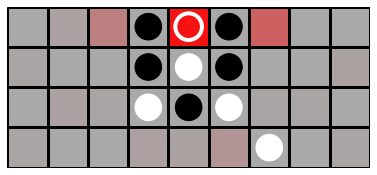

In [85]:
ind = [2351, 2292, 1878, 3994, 3892, 5390, 2161, 5159, 3737, 1326, 2620,
       4446, 3088, 3301, 3766, 5118, 2041, 4578, 1987,  994,  714, 1924,
       1282, 2683, 4189, 5312, 1169, 4859, 1228, 4171,  128, 3470, 5434,
       2928, 1485,  592, 1788, 5478, 2581, 3576, 3647, 2730, 5040,  431,
       4802, 4822, 3133, 4988,  911, 1074, 3717, 3193, 3152, 3002, 5244,
       3676, 1827, 2464, 5063, 4376,  847, 5353,  566, 4676, 3832, 1666,
       2234, 1361, 3451, 1906, 3058,   59, 1218, 2139, 4272, 5103,  196,
       3591, 3425,  974, 4027,  303, 1959, 2817, 3330, 5138, 2704,  896,
       4092, 1452, 2123,  211, 4847, 4341, 2874, 4728, 5329, 5021,  378,
       3180, 1192, 3222, 1263, 4779, 1741, 3621, 1411, 2745,   12,  413,
       1250, 3541, 1550, 2252, 2537,  463,  505, 1797, 2519, 3792, 2274,
         29, 2906, 4897, 2793, 1030, 3274, 3035, 4951, 3955, 2447, 4467,
       2660, 4643, 1301, 5284, 3371, 3867, 5222,  618, 3395, 4596, 2374,
       2309,  950, 3813,  961, 4525, 5192, 4716, 4936,  536, 3486, 2082,
        156, 4549, 1583, 3701, 4149,  107, 5413,  285, 4123, 4068, 5177,
       2435, 4322, 4034, 4255, 4006, 1388, 1991, 1515, 1705, 2220, 4750,
        173, 3349, 2096, 2400, 5372, 3928,   75, 4210,  142, 5265, 1847,
       2482,  518, 3971,  676,  800, 2019, 2982, 4898, 2971,  232, 3099,
       2492,  690,  256,  626, 2750, 4966, 4400, 3247, 4214,  228, 2859,
       1037, 4919, 2420, 3231, 1891, 1528, 2399,  446, 2335,  780,  275,
        733, 2352, 2940,  639, 1143, 4238, 3499, 2203,  812,  306, 3941,
       1018, 2840, 1373, 2960, 1171, 3102,  879, 2562, 1621, 2942, 4422,
        648, 3372, 1116,  352,  477, 3514, 1503, 4486]

show_model_example(2683)

0.4086126513003663 0.014191232999649014 Ttest_relResult(statistic=25.71815755903609, pvalue=4.535933327885413e-26)


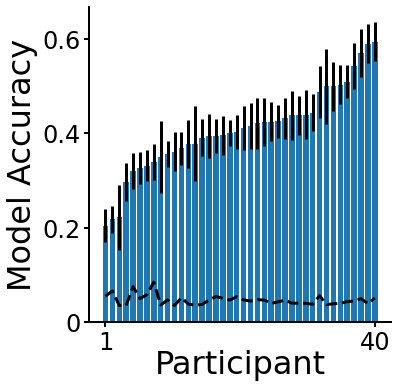

In [78]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

m = [np.mean(model_accuracy[player==i]) for i in range(40)]
s = np.array([np.std(model_accuracy[player==i])/np.sqrt(np.sum(player==i)) for i in range(40)])
chance = [np.mean(1/(36-num_pieces_hvh[player==i])) for i in np.argsort(m)]
report_stats(m,chance)

#ax.axhline(np.mean(m),color='C0')
ax.bar(x=range(1,41),height=np.sort(m),yerr=s[np.argsort(m)],width=0.8)
ax.plot(range(1,41),chance,color='black',linestyle='dashed')
ax.set_xlabel('Participant',labelpad=-5)
ax.set_ylabel('Model Accuracy')
ax.set_xticks([1,40])
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25)
fig.savefig(fig_direc + 'figure_2b.pdf')
plt.show()

In [10]:
P = np.loadtxt(direc + 'Generalization/prediction_2afc_final.txt')
accuracy_2afc_model = [np.mean(P[P[:,0]==i,1:],axis=1)>=0.5 for i in range(40)]

P = np.loadtxt(direc + 'Generalization/performance_gen_2afc.txt')
accuracy_2afc_oracle = [P[P[:,0]==i,1] for i in range(40)]

P = np.loadtxt(direc + 'Generalization/mean_across_subjects_2afc.txt')
accuracy_2afc_map = [P[P[:,0]==i,1] for i in range(40)]


In [11]:
P = np.loadtxt(direc + 'Generalization/prediction_eval_final.txt')
accuracy_eval_model = [np.corrcoef(np.mean(P[P[:,0]==i,2:],axis=1),P[P[:,0]==i,1])[0,1] for i in range(40)]

P = np.loadtxt(direc + 'Generalization/performance_gen_eval.txt')
accuracy_eval_oracle = [np.corrcoef(P[P[:,0]==i,2],P[P[:,0]==i,1])[0,1] for i in range(40)]

P = np.loadtxt(direc + 'Generalization/mean_across_subjects_eval.txt')
accuracy_eval_map = [np.corrcoef(P[P[:,0]==i,2],P[P[:,0]==i,1])[0,1] for i in range(40)]

#P = np.loadtxt(direc + 'Generalization/performance_gen_2afc.txt')
#accuracy_2afc_oracle = [P[P[:,0]==i,1] for i in range(40)]

#P = np.loadtxt(direc + 'Generalization/mean_across_subjects_2afc.txt')
#accuracy_2afc_map = [P[P[:,0]==i,1] for i in range(40)]

0.0362382456655892 0.009343064125762465 Ttest_1sampResult(statistic=3.829835699343584, pvalue=0.00045384576121293614)


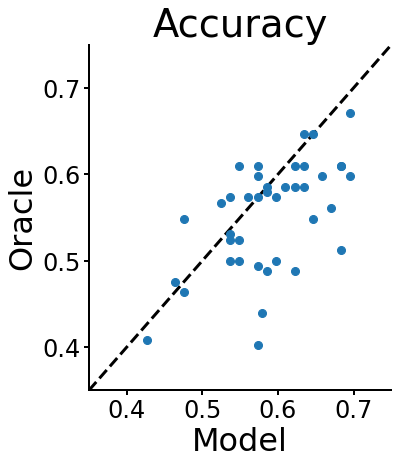

In [12]:
m1 = np.array([np.mean(p) for p in accuracy_2afc_model])
m2 = np.array([np.mean(p) for p in accuracy_2afc_oracle])

fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
report_stats(m1-m2,0)

ax.plot([0.35,0.75],[0.35,0.75],linestyle='dashed',color='black')
#ax.axhline(np.mean(m),linestyle='dashed',color='C1')
ax.plot(m1,m2,'.')
ax.set_xlabel('Model')
ax.set_ylabel('Oracle')
#ax.set_xticks([1,40])
ax.set_xlim([0.35,0.75])
ax.set_ylim([0.35,0.75])
ax.set_title('Accuracy')
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
fig.savefig(fig_direc + 'supp_fig_oracle_A.pdf')
plt.show()

0.0362382456655892 0.009343064125762465 Ttest_1sampResult(statistic=3.829835699343584, pvalue=0.00045384576121293614)


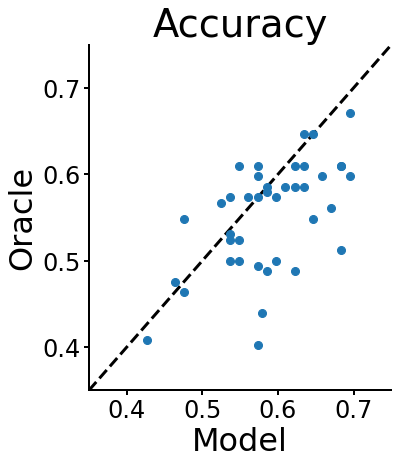

In [13]:
m1 = np.array([np.mean(p) for p in accuracy_2afc_model])
m2 = np.array([np.mean(p) for p in accuracy_2afc_oracle])

fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
report_stats(m1-m2,0)

ax.plot([0.35,0.75],[0.35,0.75],linestyle='dashed',color='black')
#ax.axhline(np.mean(m),linestyle='dashed',color='C1')
ax.plot(m1,m2,'.')
ax.set_xlabel('Model')
ax.set_ylabel('Oracle')
#ax.set_xticks([1,40])
ax.set_xlim([0.35,0.75])
ax.set_ylim([0.35,0.75])
ax.set_title('Accuracy')
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
#fig.savefig(fig_direc + 'figure_2c.pdf')
plt.show()

0.07964259803574392 0.012114208509658312 Ttest_1sampResult(statistic=6.491613909957854, pvalue=1.0767934996572299e-07)


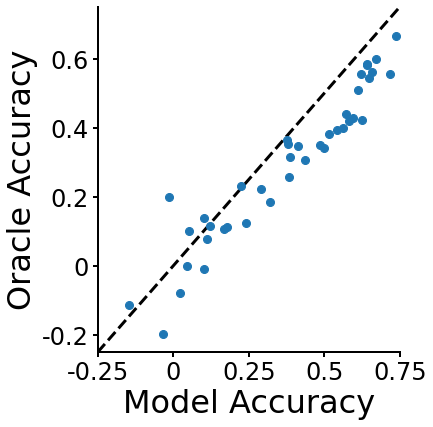

In [14]:
m1 = np.array(accuracy_eval_model)
m2 = np.array(accuracy_eval_oracle)

fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
report_stats(m1-m2,0)
lim = [-0.25,0.75]
ax.plot(lim,lim,linestyle='dashed',color='black')
ax.plot(m1,m2,'.')
ax.set_xlabel('Model Accuracy')
ax.set_ylabel('Oracle Accuracy')
ax.set_xlim(lim)
ax.set_ylim(lim)
#ax.set_title('Accuracy')
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
fig.savefig(fig_direc + 'supp_fig_oracle_B.pdf')
plt.show()

-0.030854109012461085 0.01085600225123111 Ttest_1sampResult(statistic=-2.806372996000906, pvalue=0.007779110163237697)


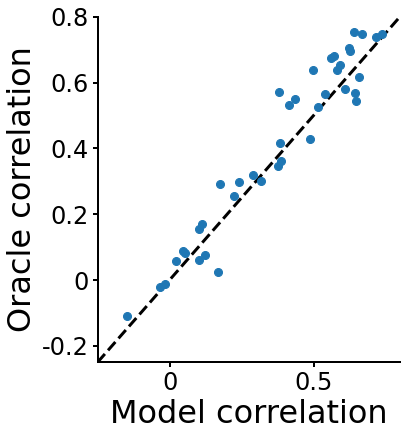

In [15]:
m1 = np.array(accuracy_eval_model)
m2 = np.array(accuracy_eval_map)

fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
report_stats(m1-m2,0)
lim = [-0.25,0.8]
ax.plot(lim,lim,linestyle='dashed',color='black')
#ax.axhline(np.mean(m),linestyle='dashed',color='C1')
ax.plot(m1,m2,'.')
ax.set_xlabel('Model correlation')
ax.set_ylabel('Oracle correlation')
#ax.set_xticks([1,40])
ax.set_xlim(lim)
ax.set_ylim(lim)
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
#fig.savefig(fig_direc + 'figure_2c.pdf')
plt.show()

0.5888480752277403 0.010217159274468075 Ttest_1sampResult(statistic=8.586578962819637, pvalue=1.5900840926556895e-10)


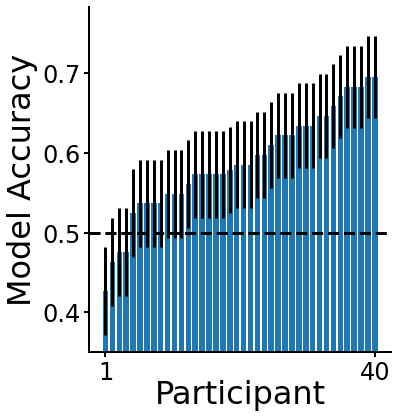

In [16]:
m = np.array([np.mean(p) for p in accuracy_2afc_model])
s = np.array([np.std(p)/np.sqrt(len(p)) for p in accuracy_2afc_model])

fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
report_stats(m,0.5)

ax.axhline(0.5,linestyle='dashed',color='black')
#ax.axhline(np.mean(m),linestyle='dashed',color='C1')
ax.bar(x=range(1,41),bottom=0,height=np.sort(m),yerr=np.array(s)[np.argsort(m)])
ax.set_ylabel('Model Accuracy')
ax.set_xlabel('Participant',labelpad=-5)
ax.set_xticks([1,40])
ax.set_ylim([0.35,None])
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
fig.savefig(fig_direc + 'figure_2c.pdf')
plt.show()

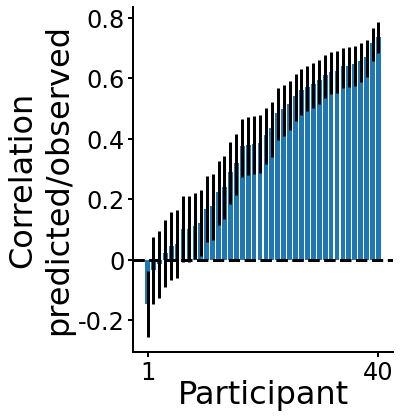

0.3769291793204087 0.03866818523151464 Ttest_1sampResult(statistic=9.62516706717529, pvalue=7.464653112886377e-12)


In [17]:
import scipy.stats as sts
m = accuracy_eval_model

fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

ax.axhline(0,linestyle='dashed',color='black')
#ax.axhline(np.mean(m),linestyle='dashed',color='C1')
lower = m-np.tanh(np.arctanh(m) - 0.9945/np.sqrt(79))
upper = np.tanh(np.arctanh(m) + 0.9945/np.sqrt(79))-m
ax.bar(x=range(1,41),bottom=0,height=np.sort(m),yerr=[np.array(lower)[np.argsort(m)],np.array(upper)[np.argsort(m)]])
ax.axhline(0,linestyle='dashed',color='black')
ax.set_ylabel('Correlation\npredicted/observed')
ax.set_xlabel('Participant',labelpad=-5)
ax.set_xticks([1,40])
#ax.set_ylim([0.35,None])
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.35,top=0.95)
fig.savefig(fig_direc + 'figure_2d.pdf')
plt.show()
report_stats(m,baseline=0)

In [95]:
def get_tpred(tmodel,player,thuman):
    tpred = np.full(len(thuman),fill_value=np.nan)
    for i in range(40):
        slope, intercept, r_value, p_value, std_err = sts.linregress(np.log(tmodel[player==i]),np.log(thuman[player==i]))
        tpred[player==i] = np.exp(np.log(tmodel[t[:,0]==i])*slope+intercept)
    return tpred

t=np.loadtxt(direc + 'Time/time_hvh_final.txt')
T=np.loadtxt(direc + 'Time/time_stopping_rule.txt')
stopping_thresh = T[0].astype('int')[1:-1]
T = T[1:,1:-1]
        
T = T[np.logical_and(t[:,1]>=6,t[:,1]<=30),:]
t = t[np.logical_and(t[:,1]>=6,t[:,1]<=30),:]
tpred_main = get_tpred(t[:,3]+0.5,t[:,0],t[:,2])

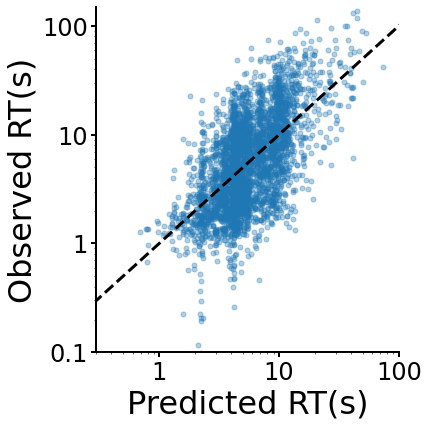

SpearmanrResult(correlation=0.5700481264084055, pvalue=1.522662526858145e-298)
0.35091947964359765


In [96]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

ax.plot(tpred_main/1000,t[:,2]/1000,'.',markersize = 10,alpha=0.35,rasterized=True)
ax.plot([0.01,1000],[0.01,1000],color='black',linestyle='dashed')
ax.plot()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([0.1,1,10,100])
ax.set_xticklabels(['0.1','1','10','100'])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ax.set_xlabel('Predicted RT(s)')
ax.set_ylabel('Observed RT(s)')
ax.set_xlim([0.3,100])
ax.set_ylim([0.1,150])
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
fig.savefig(fig_direc + 'figure_2e.pdf')
plt.show()
print(sts.spearmanr(tpred_main,t[:,2]))
print(np.mean([sts.spearmanr(tpred_main[t[:,0]==i],t[t[:,0]==i,2])[0] for i in range(40)]))

In [97]:
C = [[sts.spearmanr(np.log(T[t[:,0]==i,j]),np.log(t[t[:,0]==i,2])).correlation for i in range(40)] for j,_ in enumerate(stopping_thresh)]
m= [sts.spearmanr(np.log(t[t[:,0]==i,3]),np.log(t[t[:,0]==i,2])).correlation for i in range(40)]

In [98]:
stopping_thresh

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  14,  16,  18,
        20,  22,  24,  26,  28,  30,  40,  50,  60,  70,  80,  90, 100,
       120, 140, 160, 180, 200])

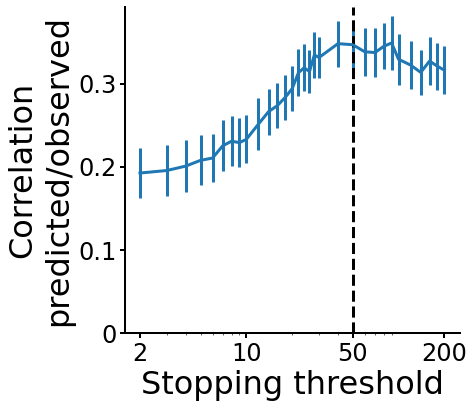

In [104]:
fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

ax.errorbar(x=stopping_thresh,y=np.mean(C,axis=1),yerr=np.std(C,axis=1)/np.sqrt(40))
ax.axvline(50,linestyle='dashed',color='black')
ax.set_ylim(bottom=0)
ax.set_xlabel('Stopping threshold')
ax.set_ylabel('Correlation\npredicted/observed')
ax.semilogx()
ax.set_xticks([2,10,50,200])
ax.set_xticklabels([2,10,50,200])
plt.show()

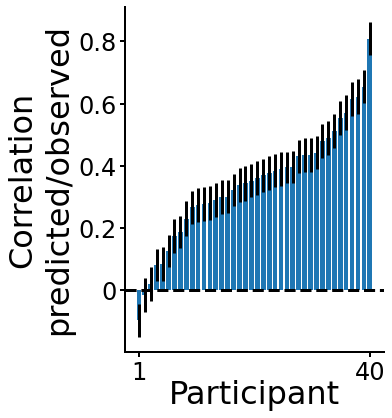

0.3462445635326518 0.02932990836477058 Ttest_1sampResult(statistic=11.65667169406061, pvalue=2.8044628844627177e-14)


In [90]:
import scipy.stats as sts
m= [sts.spearmanr(np.log(t[t[:,0]==i,3]),np.log(t[t[:,0]==i,2])).correlation for i in range(40)]
lower = m-np.tanh(np.arctanh(m) - 1/np.sqrt(79))
upper = np.tanh(np.arctanh(m) + 1/np.sqrt(79))-m
ax.axhline(0,linestyle='dashed',color='black')
ax.errorbar(x=range(1,41),y=np.sort(m),yerr=[np.array(lower)[np.argsort(m)],np.array(upper)[np.argsort(m)]],marker='p')

fig,ax=plt.subplots(figsize=(6,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

ax.axhline(0,linestyle='dashed',color='black')
#ax.axhline(np.mean(m),linestyle='dashed',color='C1')
ax.bar(x=range(1,41),bottom=0,height=np.sort(m),yerr=np.array(s)[np.argsort(m)])
ax.set_ylabel('Correlation\npredicted/observed')
ax.set_xlabel('Participant',labelpad=-5)
ax.set_xticks([1,40])
#ax.set_ylim([0.35,None])
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.35,top=0.95)
fig.savefig(fig_direc + 'figure_2f.pdf')
plt.show()
report_stats(m,0)

In [105]:
import pickle
with open(direc + 'Eye movements/eye_corrected.p','rb') as f:
    eye_corrected = pickle.load(f)
with open(direc + 'Eye movements/data_game.p','rb') as f:
    data_game = pickle.load(f)
with open(direc + 'Eye movements/eye_traces.p','rb') as f:
    eye_traces = pickle.load(f)
with open(direc + 'Eye movements/regression_results.p','rb') as f:
    regression_results = pickle.load(f)
with open(direc + 'Eye movements/eye_hist_norm.p','rb') as f:
    eye_hist_norm = pickle.load(f)

    
actual_moves = [(np.array(list(d['move']))[None,:]==np.array(range(36))[:,None]).T for d in data_game]
black_pieces = [np.vstack([(list(dd['bp'])) for i,dd in d.iterrows()]).astype(int) for d in data_game]
white_pieces = [np.vstack([(list(dd['wp'])) for i,dd in d.iterrows()]).astype(int) for d in data_game]
black_pieces = [bp*(a==0) for bp,a in zip(black_pieces,actual_moves)]
white_pieces = [wp*(a==0) for wp,a in zip(white_pieces,actual_moves)]
occupied_squares = [bp + wp for bp,wp in zip(black_pieces,white_pieces)]

In [106]:
cm = colors.LinearSegmentedColormap.from_list('gray_gold_map', [colors.to_rgb('darkgray'), 
                                                                colors.to_rgb('gold')], N=100)

def show_eye_trace(i,n):
    t = data_game[i]['timestamp'][n]
    dt = data_game[i]['rt'][n]/1000+0.5
    
    e=eye_corrected[i]
    etdt = e[np.nonzero(e[:,0]>t)[0][0]-1:np.nonzero(e[:,0]<(t+dt))[0][-1]+1,:]
    
    if len(eye_traces[i][n]['durations'])>0:
        durations = eye_traces[i][n]['durations']
        board_coords = eye_traces[i][n]['board_coords']

    fig,ax=plt.subplots(figsize=(6,4))
    ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5,color='black')
    ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5,color='black')
    for k in range(36):
        if(black_pieces[i][n][k]):
            circ = patches.Circle((k%9,k//9),0.33,color="black",fill=True)
            circ = ax.add_patch(circ)
        if(white_pieces[i][n][k]):
            circ = patches.Circle((k%9,k//9),0.33,color="white",fill=True)
            circ = ax.add_patch(circ)
        if(actual_moves[i][n][k]):
            circ = patches.Circle((k%9,k//9),0.33,fill=False,linewidth=4,
                                  color=("black" if np.sum(occupied_squares[i][n])%2==0 else "white"))
            circ = ax.add_patch(circ)
    plt.imshow(np.zeros(shape=[4,9]), cmap=cm, 
               interpolation='nearest',origin='lower',vmin=0,vmax=0.2)
    ax.scatter(board_coords[:-1,0],board_coords[:-1,1], marker='o', c='gold', 
                s=1200*np.diff(etdt[:,0]),alpha=0.5,zorder=3)
    ax.plot(board_coords[:,0],board_coords[:,1],'-k',alpha=1,zorder=2)
    ax.axis('off')
    fig.tight_layout()
    fig.savefig(fig_direc + 'figure_2g.pdf')
    plt.show()

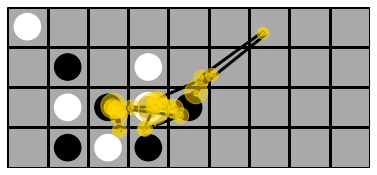

In [107]:
show_eye_trace(0,114)

In [108]:
def show_eye_hist(i,n):
    t = data_game[i]['timestamp'][n]
    dt = data_game[i]['rt'][n]/1000+0.5
    
    e=eye_corrected[i]
    etdt = e[np.nonzero(e[:,0]>t)[0][0]-1:np.nonzero(e[:,0]<(t+dt))[0][-1]+1,:]
    
    fig,ax=plt.subplots(figsize=(6,4))
    ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5,color='black')
    ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5,color='black')
    for k in range(36):
        if(black_pieces[i][n][k]):
            circ = patches.Circle((k%9,k//9),0.33,color="black",fill=True)
            circ = ax.add_patch(circ)
        if(white_pieces[i][n][k]):
            circ = patches.Circle((k%9,k//9),0.33,color="white",fill=True)
            circ = ax.add_patch(circ)
        if(actual_moves[i][n][k]):
            circ = patches.Circle((k%9,k//9),0.33,fill=False,linewidth=4,
                                  color=("black" if np.sum(occupied_squares[i][n])%2==0 else "white"))
            circ = ax.add_patch(circ)
    plt.imshow(np.reshape(eye_hist_norm[i][n],[4,9]), cmap=cm,interpolation='nearest',origin='lower',vmin=0,vmax=0.2)
    ax.axis('off')
    fig.tight_layout()
    fig.savefig(fig_direc + 'figure_2h.pdf')
    plt.show()

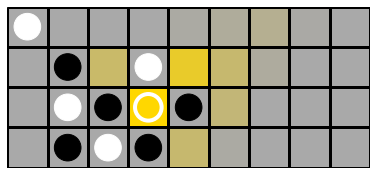

In [109]:
show_eye_hist(0,114)

In [110]:
def show_model_hist(i,n):
    t = data_game[i]['timestamp'][n]
    dt = data_game[i]['rt'][n]/1000+0.5
    
    e=eye_corrected[i]
    etdt = e[np.nonzero(e[:,0]>t)[0][0]-1:np.nonzero(e[:,0]<(t+dt))[0][-1]+1,:]
    
    fig,ax=plt.subplots(figsize=(6,4))
    ax.vlines(np.arange(-0.5,9.5,1),-0.5,3.5,color='black')
    ax.hlines(np.arange(-0.5,4.5,1),-0.5,8.5,color='black')
    for k in range(36):
        if(black_pieces[i][n][k]):
            circ = patches.Circle((k%9,k//9),0.33,color="black",fill=True)
            circ = ax.add_patch(circ)
        if(white_pieces[i][n][k]):
            circ = patches.Circle((k%9,k//9),0.33,color="white",fill=True)
            circ = ax.add_patch(circ)
        if(actual_moves[i][n][k]):
            circ = patches.Circle((k%9,k//9),0.33,fill=False,linewidth=4,
                                  color=("black" if np.sum(occupied_squares[i][n])%2==0 else "white"))
            circ = ax.add_patch(circ)
    plt.imshow(np.reshape(regression_results[0][i][0][n],[4,9]), cmap=cm,interpolation='nearest',origin='lower',vmin=0,vmax=0.2)
    ax.axis('off')
    fig.tight_layout()
    fig.savefig(fig_direc + 'figure_2i.pdf')
    plt.show()

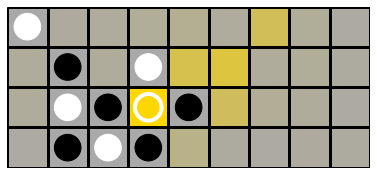

In [111]:
show_model_hist(0,114)

In [112]:
c = [[sts.pearsonr(eye_hist_norm[i][n][occupied_squares[i][n]==0],regression_results[0][i][0][n][occupied_squares[i][n]==0])[0] 
      for n in range(eye_hist_norm[i].shape[0]) if np.sum(occupied_squares[i][n])<=34]
     for i in range(10)]

C:\Users\svo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [113]:
report_stats([np.nanmean(cc) for cc in c],baseline=0)

0.5350268377540738 0.0241251990688505 Ttest_1sampResult(statistic=21.039039866055546, pvalue=5.805918854902666e-09)


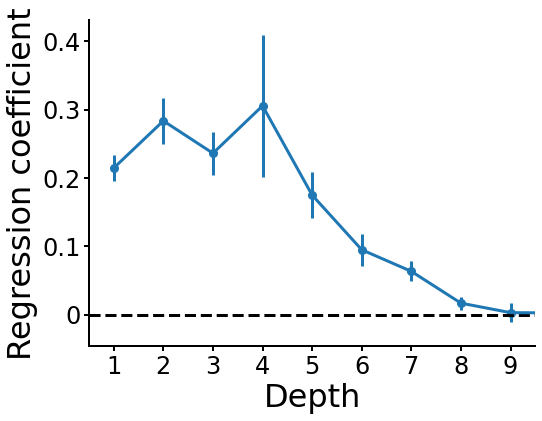

In [124]:
fig,ax=plt.subplots(figsize=(8,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

x=range(regression_results[0][0][1].shape[0])
y=np.mean(np.vstack([rr[1] for rr in regression_results[0]]),axis=0)
yerr=np.std(np.vstack([rr[1] for rr in regression_results[0]]),axis=0)/np.sqrt(len(regression_results[0]))
ax.errorbar(x=0,y=y[0],yerr=yerr[0],color='C0')
ax.plot(x,y,'.',color='C0')
ax.errorbar(x=x[1:],y=y[1:],yerr=yerr[1:],color='C0')
        
ax.set_xlabel('Depth')
ax.set_xticks(range(10))
ax.set_xlim([0.5,9.5])
ax.axhline(0,linestyle='dashed',color='black')
ax.set_ylabel('Regression coefficient')
#fig.savefig(fig_direc + 'supp_figure_eye.pdf')
plt.show()